<a href="https://colab.research.google.com/github/tyukei/AI/blob/master/report1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# レポート１

### scikit-learnのmake_regressionを用いて生成したデータに対して、基底関数を使うことで使わない場合に比べて線形回帰における学習データの誤差をが小さくなることを確認せよ。そして、基底関数を使った場合と使わない場合で汎化誤差にどのような違いが生じるか確かめよ。

[sklearn.datasets.make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html)とは
ランダムな回帰問題を生成するライブラリである。


まず、ライブラリーをインストールする

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
plt.rcParams['scatter.edgecolors'] = "gray"

## make_regressionの引数について
引数を設定することで、より幅広いデータを作成することができる。

今回活用した引数をピックアップして説明を行う。

```
n_samples
```
サンプル数を指定できる。データを多くしたり、少なくしたりできる。

```
n_features
``` 
特徴量の数を指定できる。２以上のとき非線形分離となる。

```
n_informative
```
目的変数のラベルと相関が強い特徴量の数が指定できる

```
random_state
```
乱数の状態を指定できる

## make_regressionを用いてデータを作成する。

今回は、データ数が１０のとき、２０のとき、
特徴量が１のとき、２のとき、３のときでデータを作成した。

データ数はn_samplesで指定でき、特徴量はn_featuresで指定ができる。

plt.subplotsで複数のグラフを一度にまとめてやることができる。

scatterでグラフを描写する

set_titleでタイトルを設定した。


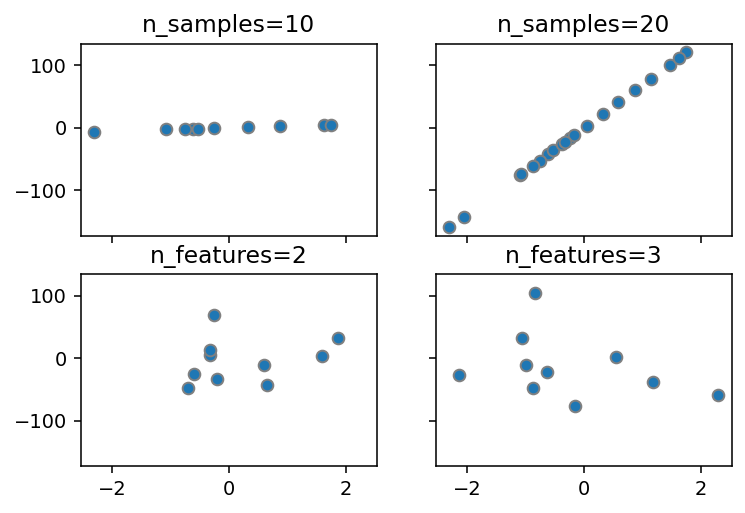

In [5]:
# データの生成
X1,Y1 = make_regression(n_samples=10,n_features=1,n_informative=1,random_state=1)
X2,Y2 = make_regression(n_samples=20,n_features=1,n_informative=1,random_state=1)
X3,Y3 = make_regression(n_samples=10,n_features=2,n_informative=1,random_state=5)
X4,Y4 = make_regression(n_samples=10,n_features=3,n_informative=1,random_state=2)

# 複数グラフの列と行を指定
fig, ax = plt.subplots(nrows=2,ncols=2,sharex=True,sharey=True,dpi=140) 
ax =ax.ravel()

# グラフに描写
ax[0].scatter(X1[:,0],Y1)
ax[1].scatter(X2[:,0],Y2)
ax[2].scatter(X3[:,0],Y3)
ax[3].scatter(X4[:,0],Y4)

# タイトルのセット
ax[0].set_title("n_samples=10")
ax[1].set_title("n_samples=20")
ax[2].set_title("n_features=2")
ax[3].set_title("n_features=3")

plt.show()

## 線形回帰の描写

まず、ライブラリを用意する。

学習データと評価データに分ける用のtrain_test_split と 線形回帰用のLinearRegressionである

線形回帰を描画する関数をlinear_lineとして作成した。

引数にはデータのｘとｙを入れる。
戻り値はないが、データの散布図とグラフの線形回帰を描画する。
以下の手順で関数を実装した。

1. まず、引数のｘをreshape(-1,1)とする。
ｘを2D配列としてmodel.fitでエラーを起こさせないためにする。

1. 次に、ホールドアウト法をtrain_test_splitを用いて分割する。学習用のｘとｙ。そして評価用のｘとｙに４分割することができる。

1. 線形回帰のモデルをLinearRegressionを用いて実装を行う。

1. 全処理したデータをmode.fitで学習の実装を行う

1. モデルに対してmodel.predictで予測を実装する

1. 係数をcoef_で算出する

1. 切片をintercept_で算出する

1. グラフに算出する


In [31]:
# ライブラリを用意
from sklearn.model_selection import train_test_split # 学習データと評価データに分ける
from sklearn.linear_model import LinearRegression #  線形回帰
from sklearn.metrics import mean_absolute_error # 平均絶対誤差(MAE: Mean Absolute Error)

In [121]:
def linear_line(X,y,title):
  x = np.array(X).reshape(-1,1) # これがないとmodel.fitで1D配列errorとなる
  train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3,random_state=2) # 学習データと評価データに分割(hold-out法)
  model = LinearRegression() # 線形回帰のモデルの実装
  model.fit(train_x,train_y) # 学習の実装
  pred_y = model.predict(test_x) # 予測の実装
  pred_y_train = model.predict(train_x)
  msb1=mean_absolute_error(test_y, pred_y) # モデルの評価(msb) 値が小さいほど誤差は小さい
  msb2=mean_absolute_error(train_y,pred_y_train)
  print("msb(test data): ",msb1)
  print("msb(train data): ",msb2)
  A=model.coef_ # 係数
  B=model.intercept_ # 切片
  xp = np.arange(-10, 10, 0.1) # x軸の等間隔にとった座標
  z = A*xp+B # 回帰直線
  plt.scatter(train_x,train_y,color='blue',label="train data") # 学習データの散布図
  plt.scatter(test_x,test_y,color='red',label="test data") # テストデータの散布図
  plt.plot(xp,z,color='green',label="linear line") # 回帰直線
  plt.xlim(-2.2, 2.4) #グラフの最小値と最大値
  plt.ylim(-100, 120) # グラフの最小値と最大値
  plt.title(title,fontname="Meiryo") # タイトルの設定
  plt.legend() # 凡例
  plt.show() # グラフの描写

msb(test data):  0.0
msb(train data):  0.0


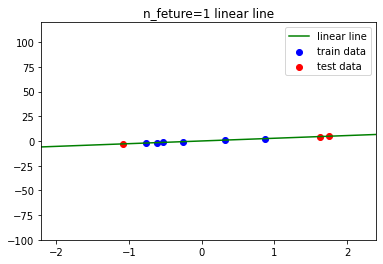

In [122]:
linear_line(X1,Y1,"n_feture=1 linear line")

msb(test data):  39.04273817631884
msb(train data):  20.242601341473694


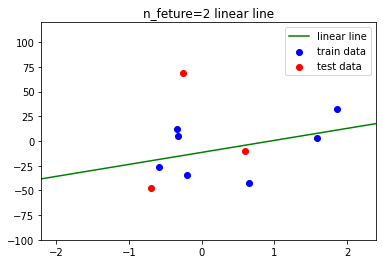

In [123]:
linear_line(X3[:,0],Y3,"n_feture=2 linear line")

msb(test data):  38.302728378081774
msb(train data):  35.515503771636624


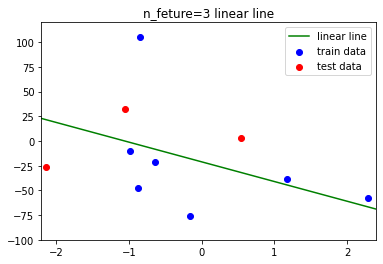

In [124]:
linear_line(X4[:,0],Y4,"n_feture=3 linear line")

In [125]:
from sklearn.preprocessing import PolynomialFeatures

In [129]:
def polinomial2(X,y,title):
  X2 = np.array(X).reshape(-1,1) # これがないとmodel.fitで1D配列errorとなる  
  poly = PolynomialFeatures(degree = 2) # 2次元の特徴量に変換
  x = poly.fit_transform(X2)
  train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3,random_state=1) # 学習データと評価データに分割(hold-out法)
  model = LinearRegression() # 線形回帰のモデルの実装
  model.fit(train_x,train_y) # 学習の実装
  pred_y = model.predict(test_x) # 予測の実装
  pred_y_train = model.predict(train_x)
  msb1=mean_absolute_error(test_y, pred_y) # モデルの評価(msb) 値が小さいほど誤差は小さい
  msb2=mean_absolute_error(train_y,pred_y_train)
  print("msb(test data): ",msb1)
  print("msb(train data): ",msb2)
  A=model.coef_ # 係数
  B=model.intercept_ # 切片
  xp = np.arange(-10, 10, 0.1) # x軸の等間隔にとった座標
  z = A[1]*xp+A[2]*xp**2+B # 多項式回帰
  plt.scatter(train_x[:,1],train_y,color='blue',label="train data") # 学習データの散布図
  plt.scatter(test_x[:,1],test_y,color='red',label="test data") # テストデータの散布図
  plt.plot(xp,z,color='green',label="linear line") # 回帰直線
  plt.xlim(-2.2, 2.4) #グラフの最小値と最大値
  plt.ylim(-100, 120) # グラフの最小値と最大値
  plt.title(title,fontname="Meiryo") # タイトルの設定
  plt.legend() # 凡例
  plt.show() # グラフの描写

msb(test data):  2.4424906541753444e-15
msb(train data):  2.9341608507950564e-15


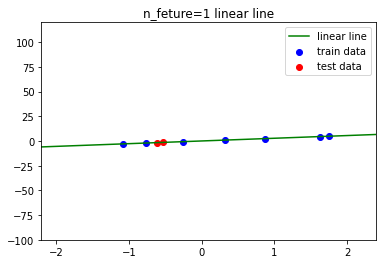

In [130]:
polinomial2(X1,Y1,"n_feture=1 linear line")

msb(test data):  17.25785898048238
msb(train data):  31.018360442892707


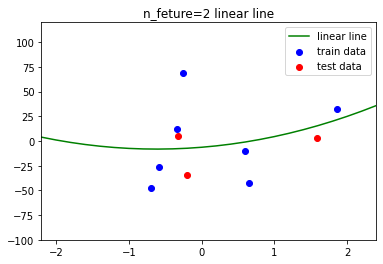

In [131]:
polinomial2(X3[:,0],Y3,"n_feture=2 linear line")

msb(test data):  62.12877588576273
msb(train data):  17.724009683000453


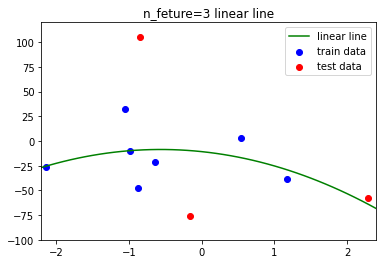

In [132]:
polinomial2(X4[:,0],Y4,"n_feture=3 linear line")

In [133]:
def polinomial3(X,y,title):
  X2 = np.array(X).reshape(-1,1) # これがないとmodel.fitで1D配列errorとなる  
  poly = PolynomialFeatures(degree = 3) # 3次元の特徴量に変換
  x = poly.fit_transform(X2)
  train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3,random_state=1) # 学習データと評価データに分割(hold-out法)
  model = LinearRegression() # 線形回帰のモデルの実装
  model.fit(train_x,train_y) # 学習の実装
  pred_y = model.predict(test_x) # 予測の実装
  pred_y_train = model.predict(train_x)
  msb1=mean_absolute_error(test_y, pred_y) # モデルの評価(msb) 値が小さいほど誤差は小さい
  msb2=mean_absolute_error(train_y,pred_y_train)
  print("msb(test data): ",msb1)
  print("msb(train data): ",msb2)
  A=model.coef_ # 係数
  B=model.intercept_ # 切片
  xp = np.arange(-10, 10, 0.1) # x軸の等間隔にとった座標
  z = A[1]*xp+A[2]*xp**2+ A[3]*xp**3+B
  plt.scatter(train_x[:,1],train_y,color='blue',label="train data") # 学習データの散布図
  plt.scatter(test_x[:,1],test_y,color='red',label="test data") # テストデータの散布図
  plt.plot(xp,z,color='green',label="linear line") # 回帰直線
  plt.xlim(-2.2, 2.4) #グラフの最小値と最大値
  plt.ylim(-100, 120) # グラフの最小値と最大値
  plt.title(title,fontname="Meiryo") # タイトルの設定
  plt.legend() # 凡例
  plt.show() # グラフの描写

msb(test data):  4.440892098500626e-16
msb(train data):  1.09436269570194e-15


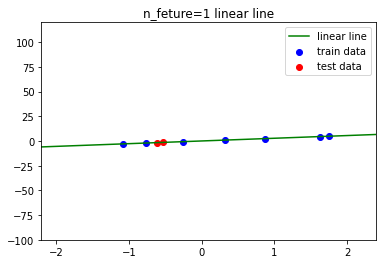

In [134]:
polinomial3(X1,Y1,"n_feture=1 linear line")

msb(test data):  55.90961258774289
msb(train data):  13.151187269523026


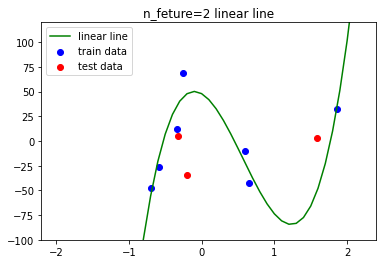

In [135]:
polinomial3(X3[:,0],Y3,"n_feture=2 linear line")


msb(test data):  89.76578649926893
msb(train data):  17.041998527458126


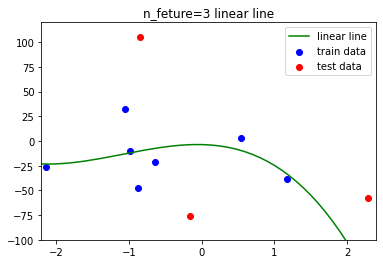

In [136]:
polinomial3(X4[:,0],Y4,"n_feture=3 linear line")

In [137]:
def polinomial5(X,y,title):
  X2 = np.array(X).reshape(-1,1) # これがないとmodel.fitで1D配列errorとなる  
  poly = PolynomialFeatures(degree = 5) # 5次元の特徴量に変換
  x = poly.fit_transform(X2)
  train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3,random_state=1) # 学習データと評価データに分割(hold-out法)
  model = LinearRegression() # 線形回帰のモデルの実装
  model.fit(train_x,train_y) # 学習の実装
  pred_y = model.predict(test_x) # 予測の実装
  pred_y_train = model.predict(train_x)
  msb1=mean_absolute_error(test_y, pred_y) # モデルの評価(msb) 値が小さいほど誤差は小さい
  msb2=mean_absolute_error(train_y,pred_y_train)
  print("msb(test data): ",msb1)
  print("msb(train data): ",msb2)
  A=model.coef_ # 係数
  B=model.intercept_ # 切片
  xp = np.arange(-10, 10, 0.1) # x軸の等間隔にとった座標
  z = A[1]*xp+A[2]*xp**2+ A[3]*xp**3+A[4]*xp**4+A[5]*xp**5+B
  plt.scatter(train_x[:,1],train_y,color='blue',label="train data") # 学習データの散布図
  plt.scatter(test_x[:,1],test_y,color='red',label="test data") # テストデータの散布図
  plt.plot(xp,z,color='green',label="linear line") # 回帰直線
  plt.xlim(-2.2, 2.4) #グラフの最小値と最大値
  plt.ylim(-100, 120) # グラフの最小値と最大値
  plt.title(title,fontname="Meiryo") # タイトルの設定
  plt.legend() # 凡例
  plt.show() # グラフの描写

msb(test data):  362.13483276141204
msb(train data):  6.845575822215608


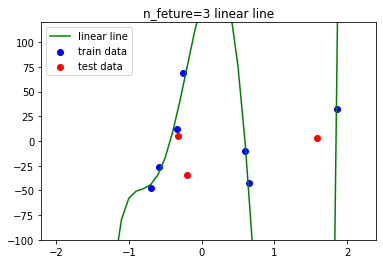

In [138]:
polinomial5(X3[:,0],Y3,"n_feture=3 linear line")

msb(test data):  9518.002621830992
msb(train data):  0.08816948044090811


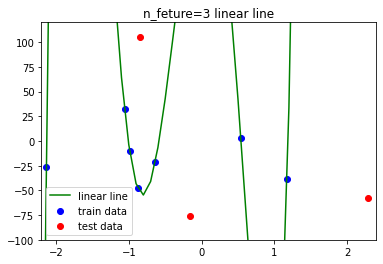

In [139]:
polinomial5(X4[:,0],Y4,"n_feture=3 linear line")